In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
#read the consolidated CSV file from dataset folder.
df = pd.read_csv('C:/Users/Genesis/OneDrive/Desktop/Projects/Time_Series_Forecasting/Dataset/Dataset.csv')
df

,Date,Actual,Goal
0,May 31 2022,0,8000
1,Jun 1 2022,0,8000
2,Jun 2 2022,0,8000
3,Jun 3 2022,1102,8000
4,Jun 4 2022,1254,8000
...,...,...,...
415,Jul 20 2023,8393,6500
416,Jul 21 2023,5954,6500
417,Jul 22 2023,9550,6500
418,Jul 23 2023,5157,6500


In [3]:
##Check the datatype of date column as we are dealing with Time series data
df['Date'].dtype

dtype('O')

In [4]:
##Changing the data type of date column from object to datetime 
df['Date'] = pd.to_datetime(df['Date'])
print(df)

          Date  Actual  Goal
0   2022-05-31       0  8000
1   2022-06-01       0  8000
2   2022-06-02       0  8000
3   2022-06-03    1102  8000
4   2022-06-04    1254  8000
..         ...     ...   ...
415 2023-07-20    8393  6500
416 2023-07-21    5954  6500
417 2023-07-22    9550  6500
418 2023-07-23    5157  6500
419 2023-07-24    8923  6500

[420 rows x 3 columns]


In [5]:
#Setting index as date
df.set_index("Date",inplace=True)
df

,Actual,Goal
Date,,
2022-05-31,0,8000
2022-06-01,0,8000
2022-06-02,0,8000
2022-06-03,1102,8000
2022-06-04,1254,8000
...,...,...
2023-07-20,8393,6500
2023-07-21,5954,6500
2023-07-22,9550,6500


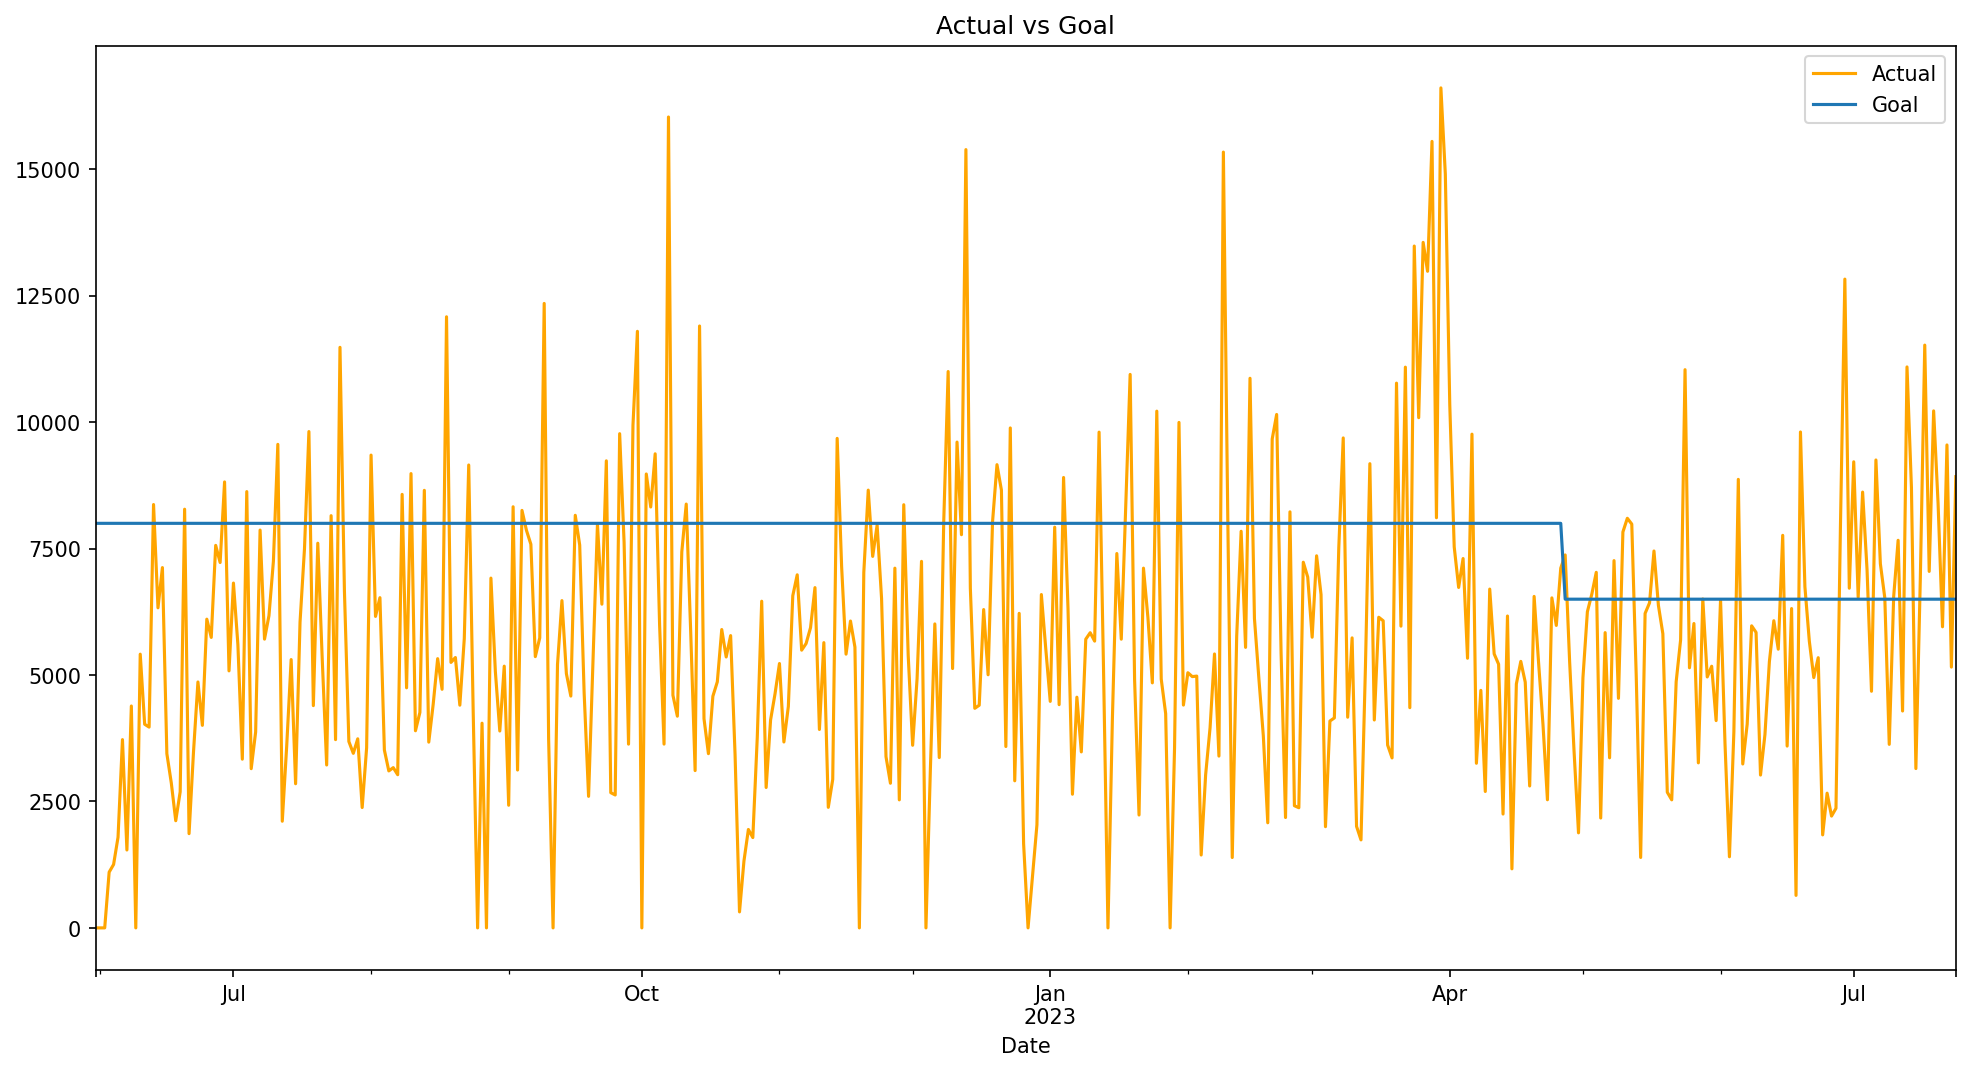

In [6]:
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)

# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
df['Actual'].plot(label='Actual', color='orange')
df['Goal'].plot(label='Goal')

# adding title to the plot
plt.title('Actual vs Goal')

# adding Label to the x-axis
plt.xlabel('Date')

# adding legend to the curve
plt.legend()


In [7]:
##Resampling the data
df.resample(rule='A').min()

,Actual,Goal
Date,,
2022-12-31,0,8000
2023-12-31,0,6500


In [8]:
#rule A signifies yearly frequency
#rule QS signifies quaterly frequency
df.resample(rule='QS').max()

,Actual,Goal
Date,,
2022-04-01,8819,8000
2022-07-01,12348,8000
2022-10-01,16035,8000
2023-01-01,16611,8000
2023-04-01,12829,8000
2023-07-01,11524,6500


In [9]:
#Checking if any null values exist in the dataset
df.isna().sum()

Actual    0
Goal      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420 entries, 2022-05-31 to 2023-07-24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Actual  420 non-null    int64
 1   Goal    420 non-null    int64
dtypes: int64(2)
memory usage: 9.8 KB


In [11]:
#Basic statistics of the working dataset
df.describe()

,Actual,Goal
count,420.000000,420.000000
mean,5674.140476,7682.142857
std,2930.565439,613.717635
min,0.000000,6500.000000
25%,3634.000000,8000.000000
50%,5402.000000,8000.000000
75%,7349.000000,8000.000000
max,16611.000000,8000.000000


<Axes: xlabel='Date'>

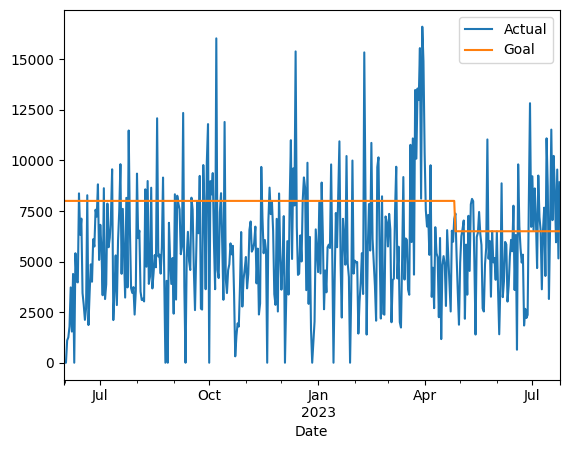

In [12]:
df.plot()

- From The plot the data looks stationary. Still we will do ADF Test to verify the same.
- Seasonality of data is not guaranteed from the plot. But it might be seasonal.

In [16]:
#checking for stationarity
#Peform Dicky Fuller Test
from statsmodels.tsa.stattools import adfuller

In [17]:
test_result = adfuller(df['Actual'])

In [18]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(actual):
    result=adfuller(actual)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [19]:
adfuller_test(df['Actual'])

ADF Test Statistic : -4.831054414326105
p-value : 4.741516040666627e-05
#Lags Used : 13
Number of Observations Used : 406
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


- Since ADF Test is showing that the data is stationary we are not doing Differencing to make it stationary.


1. Auto Regressive Model

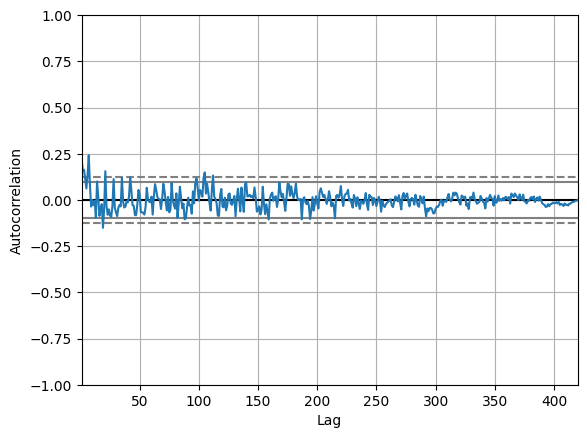

In [21]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Actual'])
plt.show()